In [99]:
import h5py
import numpy as np
from pandas import HDFStore, read_hdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [43]:
top50data = read_hdf('../data/service.h5')
top50data.head()

,Service Desciption,Service Classification
1,"It has been split into multiple APIs, includin...",Social
3,The Flickr API can be used to retrieve photos ...,Photos
5,What was formerly the ECSeCommerce Servicehas ...,eCommerce
7,The Last.fm API gives users the ability to bui...,Music
10,Bing Maps API and Interactive SDK features an ...,Mapping


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#Train, Test = train_test_split(top50data, test_size=0.2, random_state=123456)
Train, Test = train_test_split(top50data, test_size=0.2)

In [46]:
Train.head()

,Service Desciption,Service Classification
4719,The Free IP Address Info API allows developers...,Tools
9137,The Department of Health and Human Services (H...,Medical
9338,Feathercoin is a crypto currency similar to ot...,Financial
7860,The DreamApply API allows universities to exch...,Education
8139,Huobi is a Chinese BitCoin and cryptocurrency ...,Bitcoin


In [47]:
Test.head()

,Service Desciption,Service Classification
8864,CradlePoint provides networking solutions and ...,Cloud
11753,Offorte is online quotation software that lets...,Tools
9484,Vimeo is a website that allows users to view o...,Video
1066,LaunchRock helps startups design attractive co...,Social
4236,The Amazon Developer Publishing API allows dev...,Application Development


In [48]:
Train.shape

(8147, 2)

In [49]:
Test.shape

(2037, 2)

In [50]:
Trainlabelcount = Train['Service Classification'].value_counts()

In [51]:
Trainlabelcount.index

Index(['Tools', 'Financial', 'Messaging', 'eCommerce', 'Payments', 'Social',
       'Enterprise', 'Mapping', 'Telephony', 'Government', 'Science', 'Email',
       'Video', 'Security', 'Travel', 'Sports', 'Reference', 'Search', 'Games',
       'Education', 'Advertising', 'Transportation', 'Music', 'Photos',
       'Cloud', 'Bitcoin', 'Project Management', 'Other', 'Data', 'Database',
       'Backend', 'Shipping', 'Weather', 'Internet of Things', 'Real Estate',
       'Medical', 'Analytics', 'Application Development', 'Stocks', 'Banking',
       'Events', 'Entertainment', 'Storage', 'Marketing', 'File Sharing',
       'Chat', 'News Services', 'Media', 'Domains', 'Images'],
      dtype='object')

In [105]:
trainP = Trainlabelcount/Trainlabelcount.sum()

In [106]:
Testlabelcount = Test['Service Classification'].value_counts()

In [107]:
Testlabelcount = Testlabelcount[Trainlabelcount.index]

In [108]:
TestP = Testlabelcount/Testlabelcount.sum()

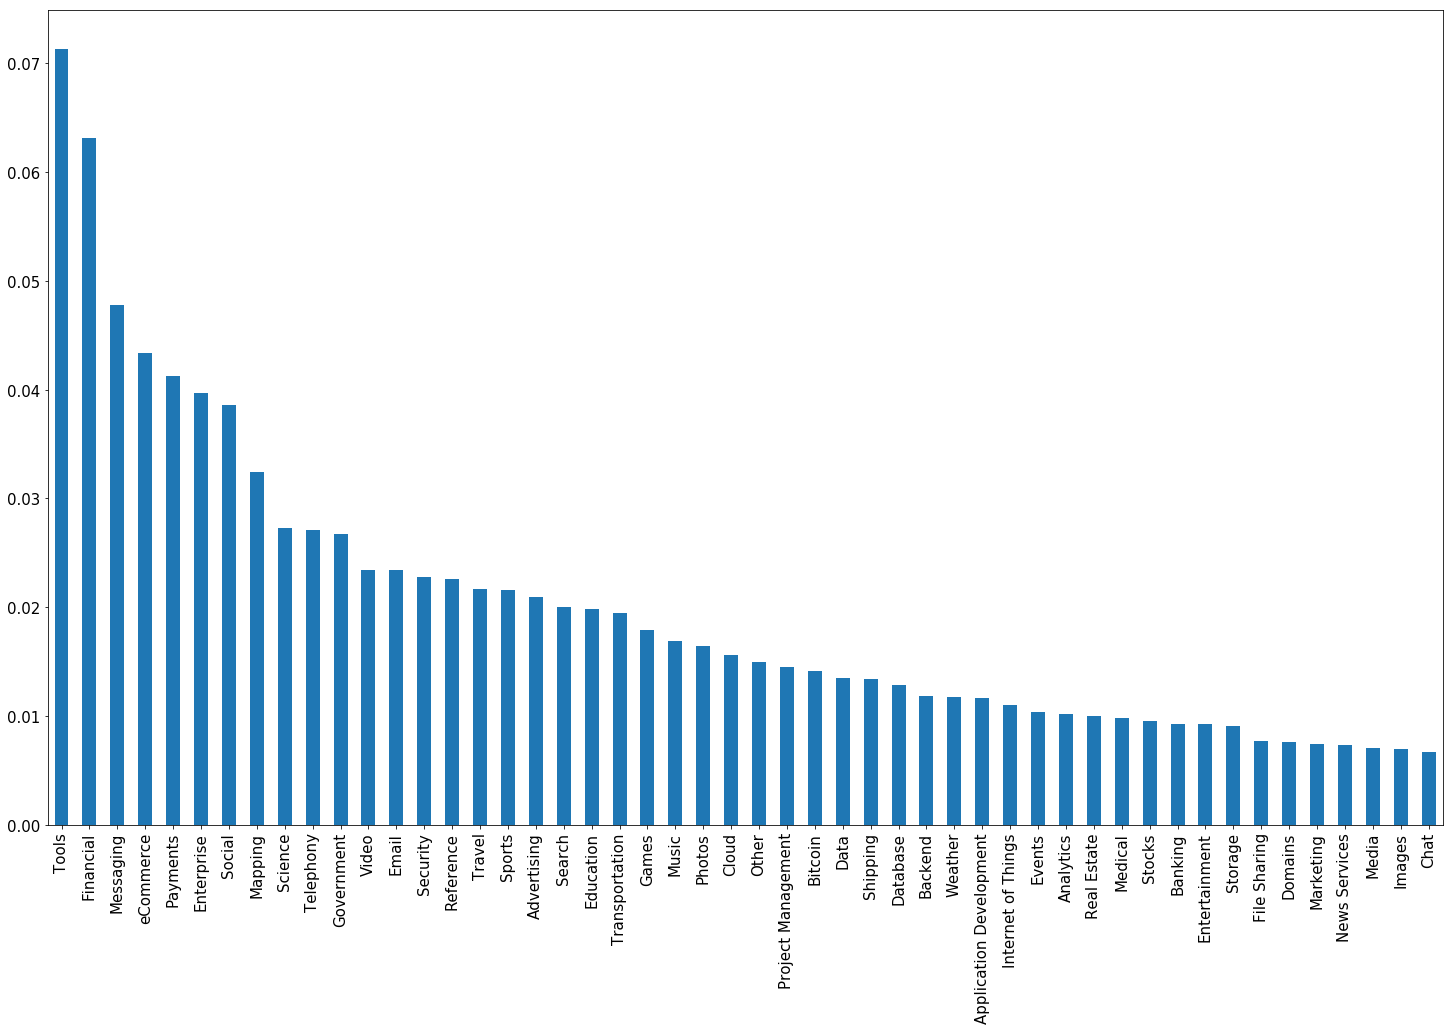

In [159]:
plt.figure(figsize=(25, 15))
trainP.plot(kind='bar', fontsize=15)
plt.savefig('Trainlabelcount.pdf', format='pdf', dpi=300)

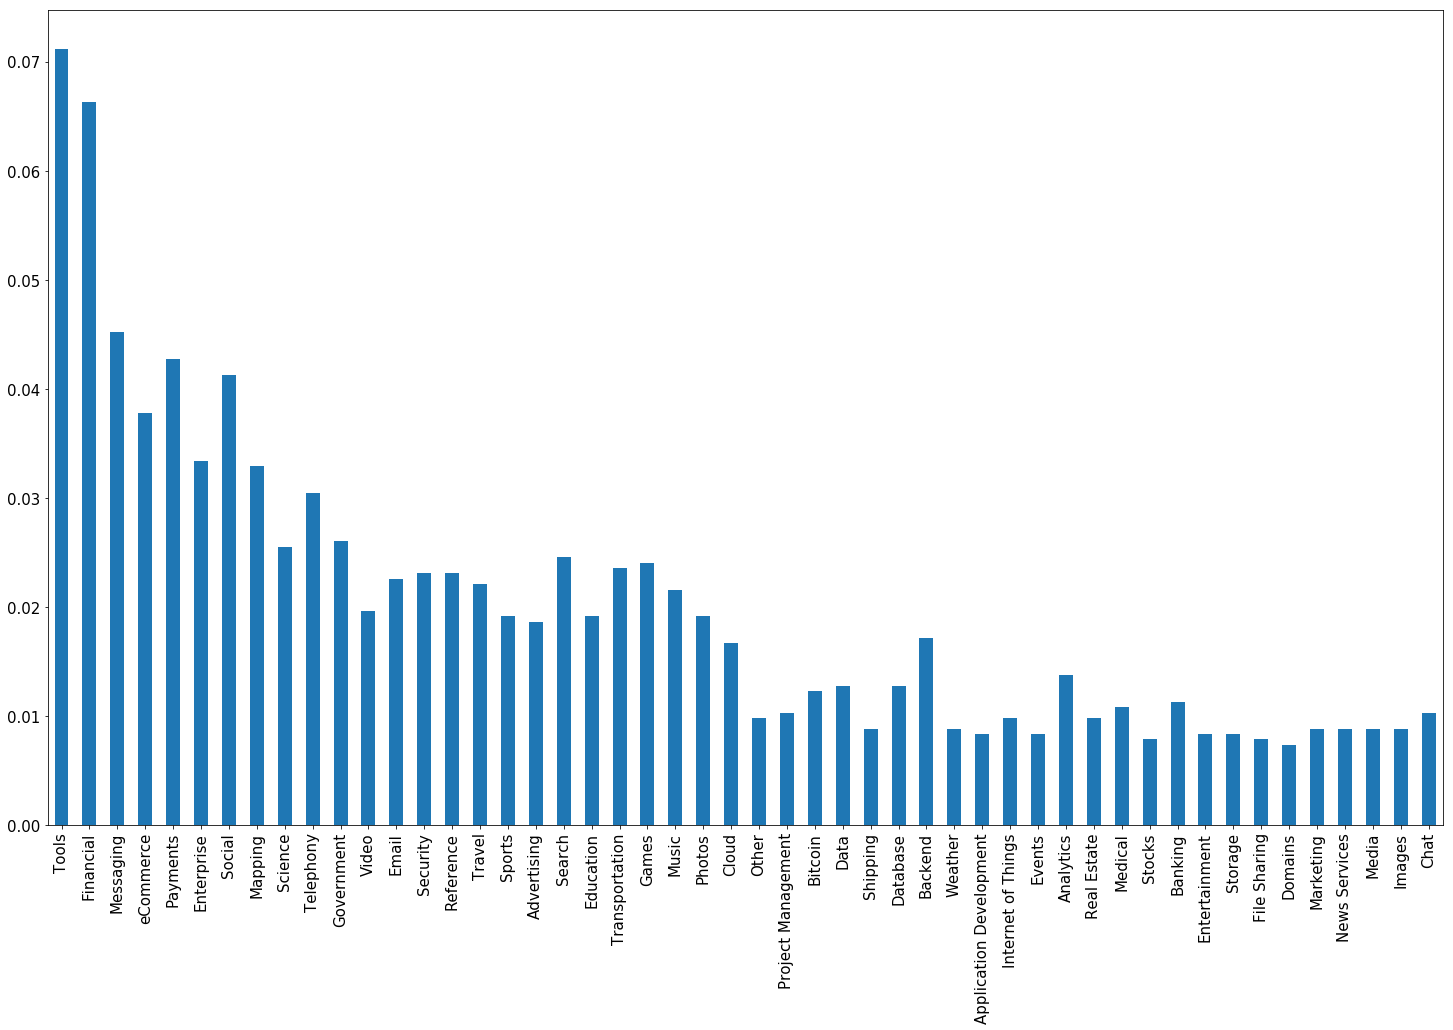

In [158]:
plt.figure(figsize=(25, 15))
TestP.plot(kind='bar', fontsize=15)
plt.savefig('Trainlabelcount.pdf', format='pdf', dpi=300)

In [143]:
comparedf = pd.DataFrame({'Training Set': trainP, 'Test Set': TestP})

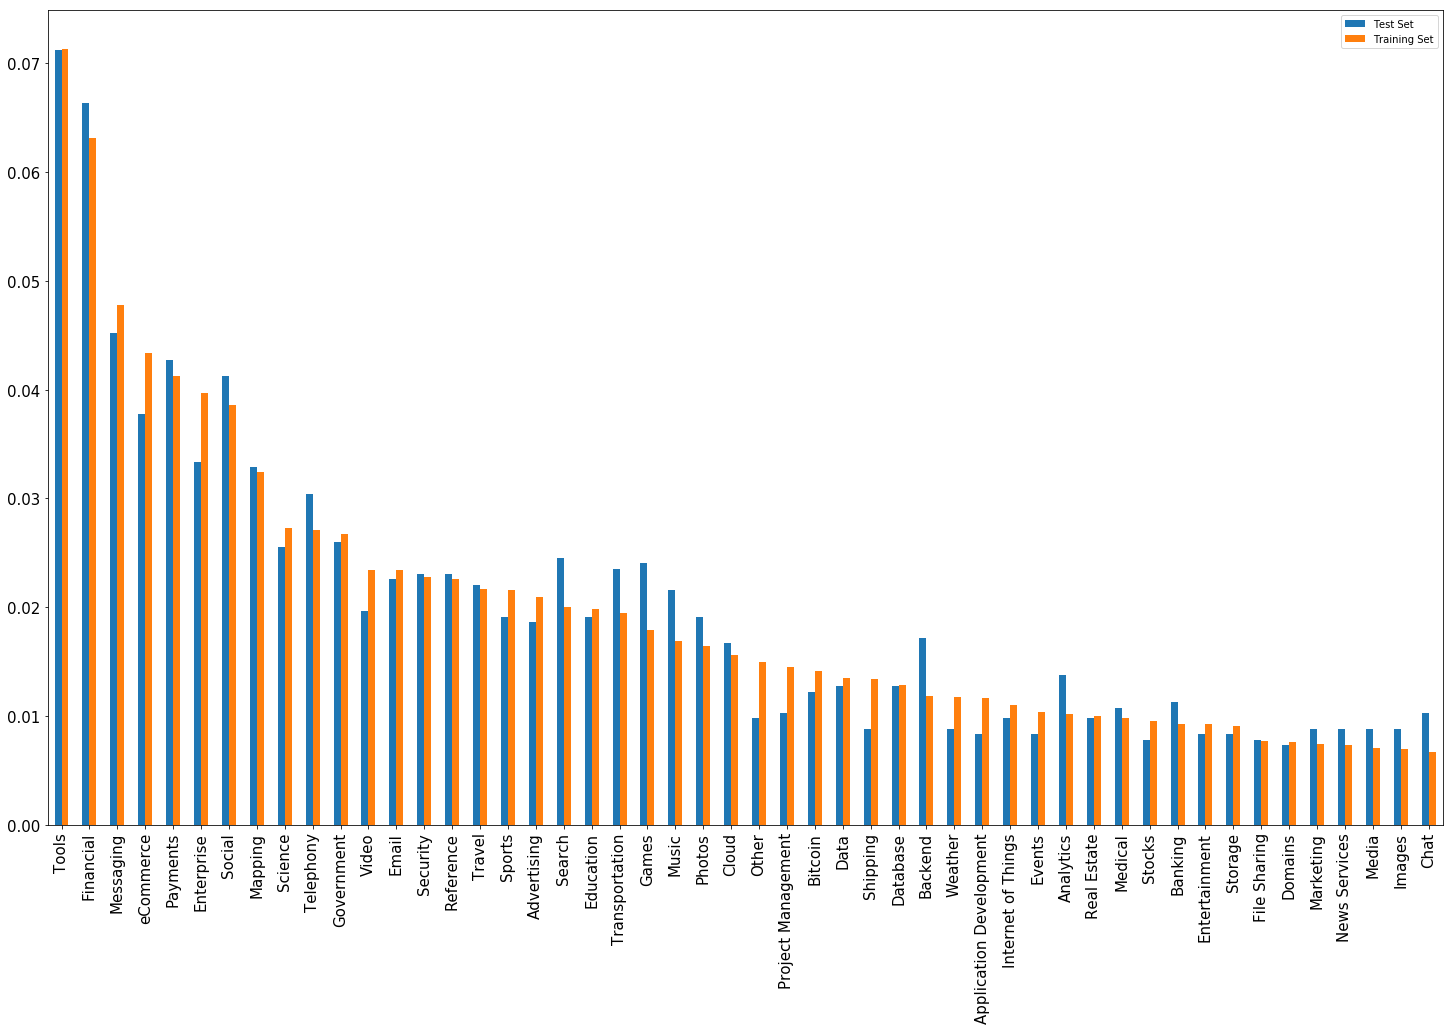

In [157]:
comparedf.plot(kind='bar', figsize=(25, 15),  fontsize=15)
plt.savefig('Comparasion_Trans_Test', format='pdf', dpi=300)

## Compute KL

In [58]:
from scipy.stats import entropy

In [59]:
entropy([0.2, 0.8], [0.8, 0.2])

0.8317766166719343

In [60]:
entropy(trainP, TestP)

0.01653403363681458

## (Optional) Compute AbsolutyMeanDissimilartyForLabels

In [61]:
precentAE = abs(trainP - TestP)

In [62]:
print("min", min(precentAE))
print("max", max(precentAE))
print("mean", np.mean(precentAE))
print("std", np.std(precentAE))

min 0.00012599847464113412
max 0.01240178099536867
mean 0.0029676659954581495
std 0.002714151373638159


## 1. Random Splitting Dataset with minmum KL

In [75]:
KLlist = []

FinalTrain, FinalTest = train_test_split(top50data, test_size=0.2, random_state=0)
FinalKL = entropy(trainP, TestP)

for i in range(10000):
    Train, Test = train_test_split(top50data, test_size=0.2, random_state=i)
    Trainlabelcount = Train['Service Classification'].value_counts()
    trainP = Trainlabelcount/Trainlabelcount.sum()
    Testlabelcount = Test['Service Classification'].value_counts()
    Testlabelcount = Testlabelcount[Trainlabelcount.index]
    TestP = Testlabelcount/Testlabelcount.sum()
    KL = entropy(trainP, TestP)
    KLlist.append(KL)
    
    if KL <= FinalKL:
        FinalTrain = Train
        FinalTest = Test
        FinalKL = KL

In [77]:
print("min", min(KLlist))
print("max", max(KLlist))
print("mean", np.mean(KLlist))
print("std", np.std(KLlist))

min 0.006859778579662757
max 0.03191408647366113
mean 0.015453553775198895
std 0.003225455273036456


## Save as H5 file

In [78]:
h5f = HDFStore('../data/RandomSplittedServices.h5')
h5f.put('AllData', top50data)
h5f.put('Train', FinalTrain)
h5f.put('Test', FinalTest)
h5f.close()

In [79]:
TrainServices = read_hdf('../data/RandomSplittedServices.h5', key='Train')
TestServices = read_hdf('../data/RandomSplittedServices.h5', key='Test')
print(TrainServices.shape)
print(TestServices.shape)

(8147, 2)
(2037, 2)


## 2. Random Splitting by Catagories

In [165]:
top50data['Service Classification']

1                    Social
3                    Photos
5                 eCommerce
7                     Music
10                  Mapping
13                   Social
17              Advertising
18                Reference
22                   Search
24                   Photos
28                    Music
29                Analytics
32                  Mapping
34                   Events
38                eCommerce
39                  Mapping
40                 Payments
41                    Music
42               Enterprise
44                   Search
45                   Photos
47                  Mapping
48                   Search
49                   Search
50                    Music
51                eCommerce
52                   Social
53                  Mapping
56                   Photos
57                    Media
                ...        
15306              Shipping
15307                Photos
15308               Medical
15310             Financial
15311            Ent

In [177]:
top50data[top50data['Service Classification'] == 'Social']

,Service Desciption,Service Classification
1,"It has been split into multiple APIs, includin...",Social
13,The Foursquare API provides location based exp...,Social
52,NationBuilder is an open platform for users to...,Social
63,Use the Tumblr API to read Tumblr data or to w...,Social
66,Facebook Social Plugins make a user's friend's...,Social
68,The MySpace Developer Platform (MDP) allows de...,Social
69,"Google Plus is a service to share links, photo...",Social
146,Note: This is in private beta as of March 2008...,Social
152,AngelList is a community of startups and inves...,Social
172,From Website: The Twitter Streaming API allows...,Social


In [190]:
Train = []
Test = []

for c in set(top50data['Service Classification']):
    C_data = top50data[top50data['Service Classification'] == c]
    print(C_data.shape)
    C_Train, C_Test = train_test_split(C_data, test_size=0.2, random_state=0)
    Train.append(C_Train)
    Test.append(C_Test)
    
Train_C = pd.concat(Train)
Test_C = pd.concat(Test)

(231, 2)
(283, 2)
(481, 2)
(75, 2)
(102, 2)
(102, 2)
(231, 2)
(111, 2)
(391, 2)
(102, 2)
(112, 2)
(195, 2)
(215, 2)
(207, 2)
(182, 2)
(274, 2)
(94, 2)
(209, 2)
(136, 2)
(93, 2)
(271, 2)
(79, 2)
(132, 2)
(222, 2)
(649, 2)
(79, 2)
(331, 2)
(78, 2)
(201, 2)
(99, 2)
(91, 2)
(76, 2)
(139, 2)
(140, 2)
(726, 2)
(398, 2)
(161, 2)
(142, 2)
(237, 2)
(77, 2)
(127, 2)
(173, 2)
(114, 2)
(430, 2)
(131, 2)
(423, 2)
(213, 2)
(233, 2)
(76, 2)
(110, 2)


In [191]:
print(Train_C.shape)
print(Test_C.shape)

(8123, 2)
(2061, 2)


In [192]:
Train_C.head()

,Service Desciption,Service Classification
4751,Entertainment Express Professional provides su...,Video
2024,The BombBomb API integrates video email into a...,Video
9429,"The Aol On Network is a large, online library ...",Video
3951,The Ooyala Usage API tracks the data and stati...,Video
14184,The AnyClip API enables the ability to build p...,Video


In [206]:
Trainlabelcount = Train_C['Service Classification'].value_counts()

In [207]:
trainP = Trainlabelcount/Trainlabelcount.sum()

In [208]:
Testlabelcount = Test_C['Service Classification'].value_counts()

In [209]:
Testlabelcount = Testlabelcount[Trainlabelcount.index]

In [210]:
TestP = Testlabelcount/Testlabelcount.sum()

In [211]:
comparedf = pd.DataFrame({'Training Set': trainP, 'Test Set': TestP})

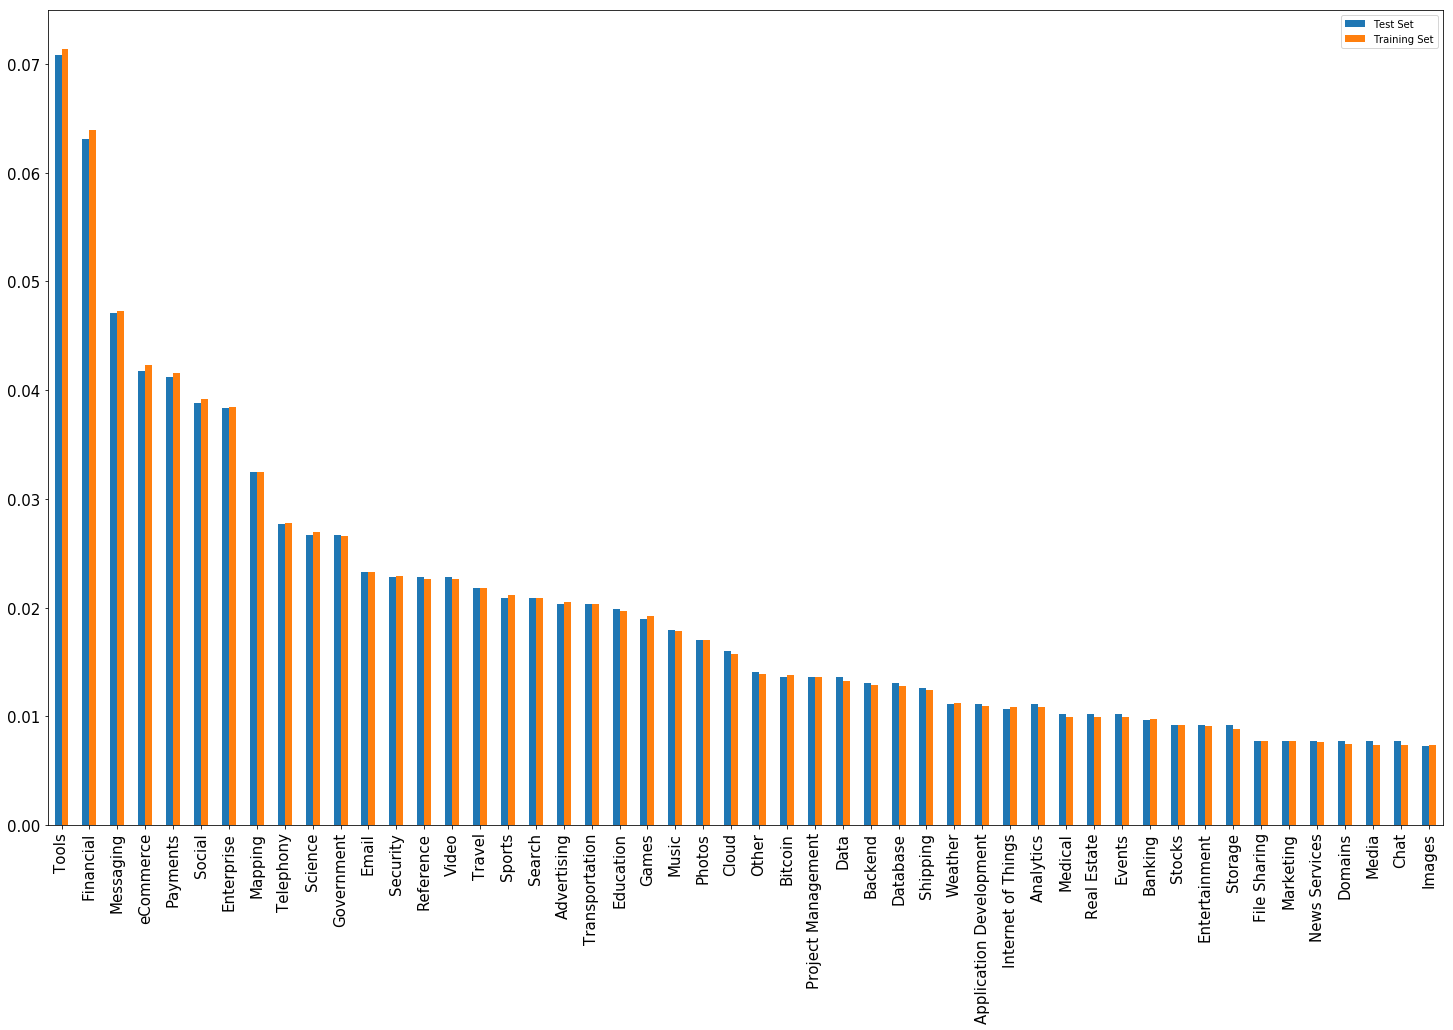

In [212]:
comparedf.plot(kind='bar', figsize=(25, 15),  fontsize=15)
plt.savefig('Comparasion_Trans_Test', format='pdf', dpi=300)

In [215]:
FinalKL / entropy(trainP, TestP)

79.20555118410631

## Save as H5 file (pd to h5)

In [226]:
Train_C = Train_C.sample(frac=1)
Test_C = Test_C.sample(frac=1)

In [227]:
h5f = HDFStore('../data/RandomSplittedByCatagories.h5')
h5f.put('AllData', top50data)
h5f.put('Train', Train_C)
h5f.put('Test', Test_C)
h5f.close()

In [228]:
TrainServices = read_hdf('../data/RandomSplittedByCatagories.h5', key='Train')
TestServices = read_hdf('../data/RandomSplittedByCatagories.h5', key='Test')
print(TrainServices.shape)
print(TestServices.shape)

(8123, 2)
(2061, 2)
